In [1]:
from sklearn import tree
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb

/anaconda3/envs/python36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/envs/python36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
#reading csv
df = pd.read_csv("home_value_calc.csv")
#df = pd.read_csv("census_data.csv")
df.head()

,Zipcode,Population,Median Age,Household Income,median_home_value,Per Capita Income,Masters holders,Bachelor holders,Median gross rent,Poverty Count,...,pop_biz,commute time car,house_age,Land-Sq-Mi,zip_code,latitude,longitude,city,state,county
0,1001,17423.0,45.0,56714.0,202800.0,30430.0,1353.0,2016.0,975.0,1462.0,...,461,NaN,49,11.442,1001,42.140549,-72.788661,Agawam,MA,Hampden
1,1002,29970.0,23.2,48923.0,344000.0,26072.0,2956.0,3161.0,1206.0,8351.0,...,480,188755.0,47,55.043,1002,42.367092,-72.464571,Amherst,MA,Hampshire
2,1003,11296.0,19.9,2499.0,-666666666.0,3829.0,10.0,3.0,1150.0,54.0,...,7,NaN,47,0.711,1003,42.369562,-72.635990,Amherst,MA,Hampshire
3,1005,5228.0,44.1,70568.0,213700.0,32169.0,327.0,505.0,926.0,230.0,...,89,NaN,47,44.242,1005,42.329160,-72.139465,Barre,MA,Worcester
4,1007,14888.0,42.5,80502.0,258000.0,36359.0,1455.0,2185.0,921.0,1410.0,...,441,NaN,36,52.643,1007,42.280267,-72.402056,Belchertown,MA,Hampshire


In [3]:
#dropping zipcode - will need to do join when we get more data
    #new data file dropped zip already
df = df.drop("Zipcode",axis=1)
df = df.drop('commute time car',axis=1)
df = df.drop(["zip_code","latitude","longitude","longitude","city","state","county"],axis=1)
df.describe()

,Population,Median Age,Household Income,median_home_value,Per Capita Income,Masters holders,Bachelor holders,Median gross rent,Poverty Count,Poverty Rate,Unemployment,Unemployment rate,pop_arc/eng,pop_stem,pop_tech,pop_biz,house_age,Land-Sq-Mi
count,32734.00000,3.273400e+04,3.273400e+04,3.273400e+04,3.245200e+04,32734.000000,32734.000000,3.273400e+04,32734.000000,32416.000000,32734.000000,32416.000000,32734.000000,32734.000000,32734.000000,32734.000000,3.273400e+04,32734.000000
mean,9589.31203,-1.061074e+07,-4.059951e+07,-4.734776e+07,-6.505330e+06,524.745280,1207.740331,-1.165550e+08,1417.329352,14.502305,356.043411,3.372403,81.333293,244.345696,123.961141,214.490835,1.835003e+07,87.043866
std,14275.36776,8.343548e+07,1.595402e+08,1.715673e+08,6.567317e+07,1025.620649,2173.247813,2.532206e+08,2723.878898,11.272743,625.013727,3.135324,173.583467,540.428574,313.193658,418.376812,1.090734e+08,254.754131
min,0.00000,-6.666667e+08,-6.666667e+08,-6.666667e+08,-6.666667e+08,0.000000,0.000000,-6.666667e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+00,0.002000
25%,708.25000,3.640000e+01,3.800000e+04,8.250000e+04,2.043975e+04,15.000000,49.000000,5.250000e+02,78.000000,6.904916,17.000000,1.791281,0.000000,4.000000,0.000000,4.000000,3.500000e+01,9.075250
50%,2742.00000,4.160000e+01,4.897000e+04,1.233000e+05,2.511150e+04,83.000000,216.000000,6.910000e+02,329.000000,12.164989,84.000000,2.973439,12.000000,32.000000,10.000000,33.000000,4.400000e+01,36.033500
75%,12786.75000,4.670000e+01,6.210550e+04,1.961000e+05,3.134600e+04,523.000000,1297.000000,9.090000e+02,1448.750000,19.332568,416.000000,4.299858,79.000000,218.000000,95.000000,216.000000,5.800000e+01,89.026250
max,115104.00000,9.530000e+01,2.500010e+05,2.000001e+06,2.281240e+05,16057.000000,25371.000000,3.501000e+03,40661.000000,100.000000,9698.000000,100.000000,3957.000000,11011.000000,9189.000000,8139.000000,6.666687e+08,13430.914000


In [4]:
print("minimum stats")
print("-------")
print(df.min())
print("-------")
print("maximum stats")
print("-------")
print(df.max())

minimum stats
-------
Population           0.000000e+00
Median Age          -6.666667e+08
Household Income    -6.666667e+08
median_home_value   -6.666667e+08
Per Capita Income   -6.666667e+08
Masters holders      0.000000e+00
Bachelor holders     0.000000e+00
Median gross rent   -6.666667e+08
Poverty Count        0.000000e+00
Poverty Rate         0.000000e+00
Unemployment         0.000000e+00
Unemployment rate    0.000000e+00
pop_arc/eng          0.000000e+00
pop_stem             0.000000e+00
pop_tech             0.000000e+00
pop_biz              0.000000e+00
house_age            4.000000e+00
Land-Sq-Mi           2.000000e-03
dtype: float64
-------
maximum stats
-------
Population           1.151040e+05
Median Age           9.530000e+01
Household Income     2.500010e+05
median_home_value    2.000001e+06
Per Capita Income    2.281240e+05
Masters holders      1.605700e+04
Bachelor holders     2.537100e+04
Median gross rent    3.501000e+03
Poverty Count        4.066100e+04
Poverty Rate   

In [5]:
#drops zeros
df.dropna()
df.describe()

,Population,Median Age,Household Income,median_home_value,Per Capita Income,Masters holders,Bachelor holders,Median gross rent,Poverty Count,Poverty Rate,Unemployment,Unemployment rate,pop_arc/eng,pop_stem,pop_tech,pop_biz,house_age,Land-Sq-Mi
count,32734.00000,3.273400e+04,3.273400e+04,3.273400e+04,3.245200e+04,32734.000000,32734.000000,3.273400e+04,32734.000000,32416.000000,32734.000000,32416.000000,32734.000000,32734.000000,32734.000000,32734.000000,3.273400e+04,32734.000000
mean,9589.31203,-1.061074e+07,-4.059951e+07,-4.734776e+07,-6.505330e+06,524.745280,1207.740331,-1.165550e+08,1417.329352,14.502305,356.043411,3.372403,81.333293,244.345696,123.961141,214.490835,1.835003e+07,87.043866
std,14275.36776,8.343548e+07,1.595402e+08,1.715673e+08,6.567317e+07,1025.620649,2173.247813,2.532206e+08,2723.878898,11.272743,625.013727,3.135324,173.583467,540.428574,313.193658,418.376812,1.090734e+08,254.754131
min,0.00000,-6.666667e+08,-6.666667e+08,-6.666667e+08,-6.666667e+08,0.000000,0.000000,-6.666667e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+00,0.002000
25%,708.25000,3.640000e+01,3.800000e+04,8.250000e+04,2.043975e+04,15.000000,49.000000,5.250000e+02,78.000000,6.904916,17.000000,1.791281,0.000000,4.000000,0.000000,4.000000,3.500000e+01,9.075250
50%,2742.00000,4.160000e+01,4.897000e+04,1.233000e+05,2.511150e+04,83.000000,216.000000,6.910000e+02,329.000000,12.164989,84.000000,2.973439,12.000000,32.000000,10.000000,33.000000,4.400000e+01,36.033500
75%,12786.75000,4.670000e+01,6.210550e+04,1.961000e+05,3.134600e+04,523.000000,1297.000000,9.090000e+02,1448.750000,19.332568,416.000000,4.299858,79.000000,218.000000,95.000000,216.000000,5.800000e+01,89.026250
max,115104.00000,9.530000e+01,2.500010e+05,2.000001e+06,2.281240e+05,16057.000000,25371.000000,3.501000e+03,40661.000000,100.000000,9698.000000,100.000000,3957.000000,11011.000000,9189.000000,8139.000000,6.666687e+08,13430.914000


In [6]:
df.sort_values(by=['house_age'],ascending=False).head(50)
df['house_age'].unique()

array([       49,        47,        36,        55,        79,        70,
              63,        60,        59,        58,        52,        56,
              46,        53,        44,        51,        62,        77,
              48,        45,        54, 666668684,        37,        40,
              41,        38,        72,        73,        69,        61,
              74,        71,        68,        65,        33,        35,
              57,        43,        39,        66,        42,        50,
              64,        67,        28,        20,        30,        34,
              75,        76,        78,        15,        32,        26,
              27,        29,        31,        25,        24,        13,
              17,        23,        18,        16,        19,        14,
              11,        21,        22,        12,        10,         6,
               9,         7,         8,         4])

In [7]:
#checking if masters is ever higher then the population
df['Masters holders'].tolist()
df['Population'].tolist()
ziped = zip(df['Masters holders'].tolist(),df['Population'].tolist())
for x,y in ziped:
    if x > y:
        print("needs to be drop")
        print(x)
        print(y)

In [8]:
#checking if bachelors is ever higher then the population
df['Bachelor holders'].tolist()
df['Population'].tolist()
ziped = zip(df['Bachelor holders'].tolist(),df['Population'].tolist())
for x,y in ziped:
    if x > y:
        print("might need to drop")
        print(x)
        print(y)

In [9]:
#cleaning out houses with ages over an expected average for a zipcode-especially those that would be older then the country
df = df.loc[(df[['house_age']]<100).all(axis=1)] 

In [10]:
#drops any negative values because they're more then likely errors
df = df.loc[(df[['Median Age','Household Income','median_home_value',"Per Capita Income",
                'Median gross rent']]>0).all(axis=1)] 

df.describe()


,Population,Median Age,Household Income,median_home_value,Per Capita Income,Masters holders,Bachelor holders,Median gross rent,Poverty Count,Poverty Rate,Unemployment,Unemployment rate,pop_arc/eng,pop_stem,pop_tech,pop_biz,house_age,Land-Sq-Mi
count,26531.000000,26531.000000,26531.000000,2.653100e+04,26531.000000,26531.000000,26531.000000,26531.000000,26531.000000,26531.000000,26531.000000,26531.000000,26531.000000,26531.000000,26531.000000,26531.000000,26531.000000,26531.000000
mean,11704.029701,41.452938,54888.925973,1.825837e+05,27959.907391,642.941088,1479.753835,843.226980,1734.506502,14.458526,435.177415,3.400002,99.670913,299.651087,152.181750,263.113264,45.449173,91.912276
std,15084.446603,7.186933,22182.274111,1.617553e+05,11755.796659,1106.047980,2331.055254,342.055889,2936.022367,9.114016,669.640329,2.014001,188.082361,586.557729,341.721165,450.977261,15.078361,238.695498
min,26.000000,13.700000,9063.000000,9.999000e+03,3373.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.021000
25%,1447.000000,36.700000,40710.500000,9.170000e+04,21055.500000,37.000000,107.000000,623.000000,166.000000,7.788665,39.000000,2.123840,3.000000,12.000000,2.000000,13.000000,35.000000,12.619000
50%,4645.000000,41.300000,50519.000000,1.350000e+05,25429.000000,152.000000,389.000000,753.000000,543.000000,12.579035,145.000000,3.112687,23.000000,61.000000,22.000000,59.000000,43.000000,41.407000
75%,17170.500000,45.600000,63155.000000,2.087000e+05,31484.000000,767.500000,1899.000000,967.000000,1995.000000,19.162763,564.000000,4.300762,115.000000,322.000000,146.000000,321.000000,55.000000,96.246000
max,115104.000000,84.300000,250001.000000,2.000001e+06,166343.000000,16057.000000,25371.000000,3501.000000,40661.000000,76.164384,9698.000000,27.702703,3957.000000,11011.000000,9189.000000,8139.000000,79.000000,13430.914000


In [11]:
#segment out my Y-target and X's-data
target = df['median_home_value']
data = df.drop('median_home_value', axis = 1)
print(data.shape, target.shape)

(26531, 17) (26531,)


In [12]:
#data = data.drop('Population', axis = 1)
#data = data.drop("Median Age", axis = 1)



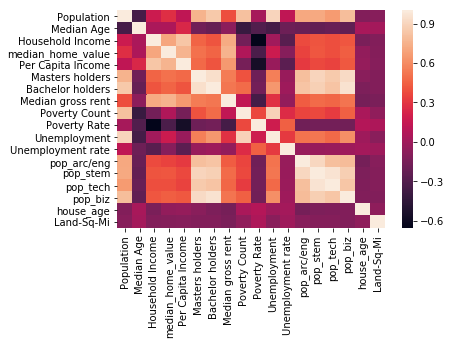

In [13]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


In [14]:
#df = df.drop([ 'Poverty Count','pop_arc/eng','pop_stem','Population','pop_tech','Unemployment','pop_biz'],axis=1)

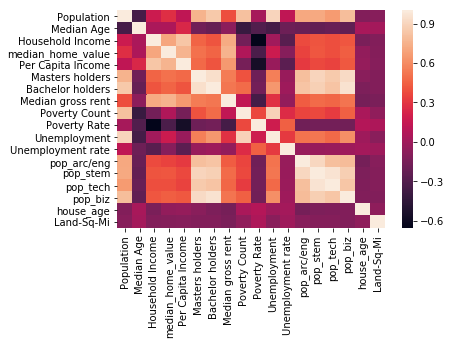

In [15]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [16]:
#segment out my Y-target and X's-data
target = df['median_home_value']
data = df.drop('median_home_value', axis = 1)
print(data.shape, target.shape)

(26531, 17) (26531,)


In [17]:
#importing test train and scaling data down
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

target = target.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_scaler = StandardScaler().fit(y_train)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


In [18]:
#creating a decision tree model  and testing it
from sklearn.tree import DecisionTreeRegressor
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train_scaled, y_train_scaled)
print(clf.score(X_test_scaled, y_test_scaled))


0.6212972406202788


In [19]:
#importing a random forest regression model and testing it
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=300)
rf = rf.fit(X_train_scaled, y_train_scaled)
rf.score(X_test_scaled, y_test_scaled)

/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.8164098492199974

In [20]:
importances = rf.feature_importances_
importances

array([0.00810018, 0.0266768 , 0.02267789, 0.23969623, 0.01332618,
       0.01606237, 0.52134155, 0.01283956, 0.02140124, 0.00874894,
       0.01595005, 0.01115115, 0.00814224, 0.00749242, 0.00818217,
       0.03408404, 0.02412699])

In [21]:
sorted(zip(rf.feature_importances_, data.keys()), reverse=True)

[(0.5213415472542606, 'Median gross rent'),
 (0.2396962323677239, 'Per Capita Income'),
 (0.03408404434404782, 'house_age'),
 (0.026676804230344024, 'Median Age'),
 (0.02412699492104829, 'Land-Sq-Mi'),
 (0.022677888518908174, 'Household Income'),
 (0.021401239090992938, 'Poverty Rate'),
 (0.016062368344909896, 'Bachelor holders'),
 (0.01595005031654888, 'Unemployment rate'),
 (0.013326177523913647, 'Masters holders'),
 (0.01283955683631773, 'Poverty Count'),
 (0.011151151625145118, 'pop_arc/eng'),
 (0.00874894166102141, 'Unemployment'),
 (0.00818217335494608, 'pop_biz'),
 (0.008142237875534737, 'pop_stem'),
 (0.00810017663064139, 'Population'),
 (0.007492415103695199, 'pop_tech')]

In [22]:
#ignore for now- need to look into nn regression
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=40, activation='relu', input_dim=len(data.keys())))
model.add(Dense(units=100, activation='relu'))
#model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=1))

Using TensorFlow backend.


In [23]:
#also ignore  still doing research
model.compile(optimizer='adam',
              loss='mean_squared_error',metrics=['mean_squared_error'])
model.fit(
    X_train_scaled,
    y_train_scaled,
    epochs=40,verbose=2)

Epoch 1/40
 - 2s - loss: 0.2888 - mean_squared_error: 0.2888
Epoch 2/40
 - 1s - loss: 0.2223 - mean_squared_error: 0.2223
Epoch 3/40
 - 2s - loss: 0.2147 - mean_squared_error: 0.2147
Epoch 4/40
 - 2s - loss: 0.2033 - mean_squared_error: 0.2033
Epoch 5/40
 - 1s - loss: 0.1985 - mean_squared_error: 0.1985
Epoch 6/40
 - 1s - loss: 0.1950 - mean_squared_error: 0.1950
Epoch 7/40
 - 1s - loss: 0.1868 - mean_squared_error: 0.1868
Epoch 8/40
 - 1s - loss: 0.1856 - mean_squared_error: 0.1856
Epoch 9/40
 - 1s - loss: 0.1820 - mean_squared_error: 0.1820
Epoch 10/40
 - 1s - loss: 0.1767 - mean_squared_error: 0.1767
Epoch 11/40
 - 1s - loss: 0.1763 - mean_squared_error: 0.1763
Epoch 12/40
 - 1s - loss: 0.1712 - mean_squared_error: 0.1712
Epoch 13/40
 - 1s - loss: 0.1686 - mean_squared_error: 0.1686
Epoch 14/40
 - 1s - loss: 0.1671 - mean_squared_error: 0.1671
Epoch 15/40
 - 2s - loss: 0.1669 - mean_squared_error: 0.1669
Epoch 16/40
 - 2s - loss: 0.1661 - mean_squared_error: 0.1661
Epoch 17/40
 - 2s

In [24]:
score = model.evaluate(X_test_scaled, y_test_scaled )
print(score)

6633/6633 [==============================] - 0s 63us/step
[0.18735650946036123, 0.18735650946036123]


In [25]:
preneural= model.predict(X_test_scaled)

In [26]:
from sklearn.svm import SVR
sv = SVR()
#svr = sv.fit(X_train_scaled, y_train_scaled)
#svr.score(X_test_scaled, y_test_scaled)

In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(sv, param_grid, verbose=3)

In [28]:
#grid.fit(X_train_scaled, y_train_scaled)

In [29]:
#importing a linear regression model and fitting it
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
#looking at mse and r2 scores for the linear regression model - ignore MSE 
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
train = model.score(X_train_scaled,y_train_scaled)
print(f"train: {train}, R2: {r2}")

train: 0.7202133291051112, R2: 0.7383351669539048


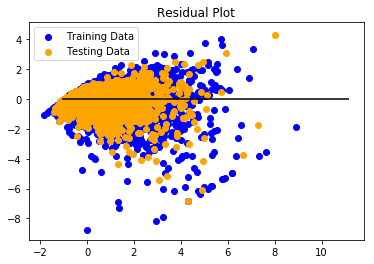

In [31]:
#still unsure how to uderstand this pls ignore
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [32]:
actual = y_scaler.inverse_transform(y_test_scaled)
predict = y_scaler.inverse_transform(predictions)
rfpredict = y_scaler.inverse_transform(rf.predict(X_test_scaled))
trepredict = y_scaler.inverse_transform(clf.predict(X_test_scaled))
preneural=y_scaler.inverse_transform(preneural)
df = pd.DataFrame()
df['RF']= rfpredict
df['Actual'] = actual
df["Neural"] = preneural
#neural =df["Neural"].tolist()
#actual =df['Actual'].tolist()
#comparison = zip(neural,actual)
df["Linear"] = predict
df['Tree'] = trepredict
df = df.round(0)
#print(f'{comparison}')
#for x,y in comparison:
 #   print(f'actual:{y},nerual:{x}')
df.head(15)

,RF,Actual,Neural,Linear,Tree
0,97432.0,147600.0,97150.0,20959.0,75800.0
1,105270.0,157700.0,100425.0,111173.0,118100.0
2,416826.0,432400.0,344546.0,447739.0,416600.0
3,114648.0,96800.0,99600.0,87448.0,116950.0
4,145763.0,159800.0,140297.0,143557.0,173400.0
5,146454.0,139400.0,148846.0,193923.0,147600.0
6,83422.0,113000.0,77241.0,49725.0,70600.0
7,141840.0,193200.0,157983.0,106433.0,96700.0
8,514757.0,340400.0,402316.0,587081.0,432800.0
9,95845.0,71600.0,92867.0,77720.0,80800.0


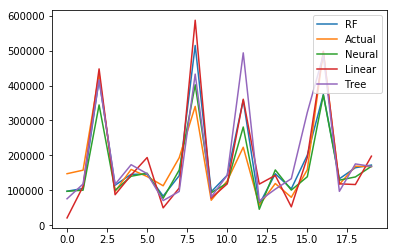

In [33]:
df[:20].plot.line()

In [34]:
df.to_csv("model_predictions.csv", encoding="utf-8", index=False)

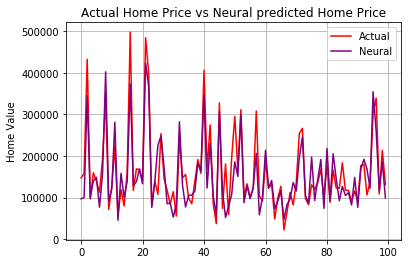

In [35]:
plt.plot(df['Actual'][:100].tolist(), c='red',label='Actual')
plt.plot(df['Neural'][:100].tolist(),c='purple',label='Neural')
plt.legend()
plt.title("Actual Home Price vs Neural predicted Home Price")
plt.ylabel("Home Value")
plt.grid()

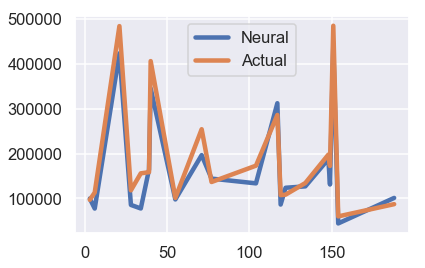

In [55]:
sns.set(style='darkgrid')
sns.set_context("talk",rc={"lines.linewidth":4.5})
linear_seg = df[:200].sample(n=20,random_state=5)
sns.lineplot(data=linear_seg['Neural'],style='event',hue="region",label='Neural')
sns.lineplot(data=linear_seg['Actual'],style='event',hue="region",label='Actual')
plt.savefig("NeuralNet.png",bbox_inches='tight')
plt.legend()

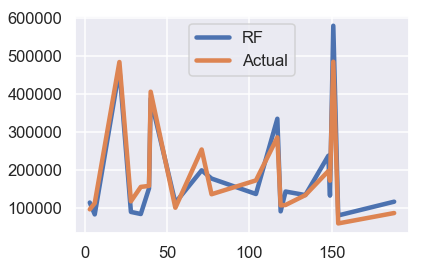

In [56]:
sns.set(style='darkgrid')
sns.set_context("talk",rc={"lines.linewidth":4.5})
#linear_seg = df[:200].sample(n=20,random_state=1)
sns.lineplot(data=linear_seg['RF'],style='event',hue="region",label='RF')
sns.lineplot(data=linear_seg['Actual'],style='event',hue="region",label='Actual')
plt.savefig("Randomforest.png",bbox_inches='tight')
plt.legend()

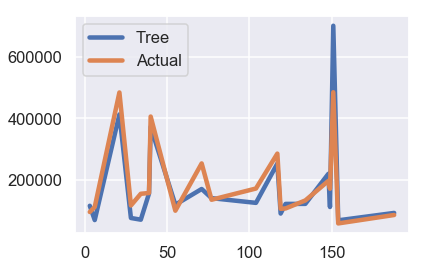

In [57]:
sns.set(style='darkgrid')
sns.set_context("talk",rc={"lines.linewidth":4.5})
#linear_seg = df[:200].sample(n=20,random_state=1)
sns.lineplot(data=linear_seg['Tree'],style='event',hue="region",label='Tree')
sns.lineplot(data=linear_seg['Actual'],style='event',hue="region",label='Actual')
plt.legend()
plt.savefig("tree.png",bbox_inches='tight')
plt.show()

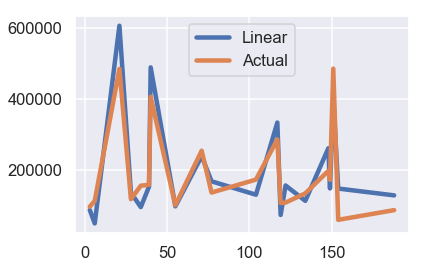

In [58]:
sns.set(style='darkgrid')
sns.set_context("talk",rc={"lines.linewidth":4.5})
#linear_seg = df[:200].sample(n=20,random_state=1)
sns.lineplot(data=linear_seg['Linear'],style='event',hue="region",label='Linear')
sns.lineplot(data=linear_seg['Actual'],style='event',hue="region",label='Actual')
plt.savefig("Linear.png",bbox_inches='tight')
plt.legend()

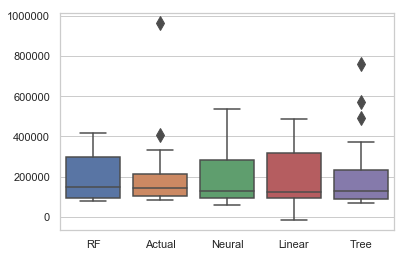

In [59]:
sns.set(style='whitegrid')
boxes =sns.boxplot(data=df[:200].sample(n=20,random_state=1),fliersize=10)

In [41]:
saver= boxes.get_figure()
saver.savefig("Models Box Plot")

/anaconda3/envs/python36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


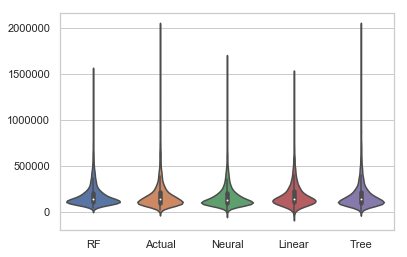

In [42]:
sns.violinplot(data=df)
